# Predicting Annual Salary for Data Science and STEM Roles based on LEVELS.FYI Data

Author: 
- Lim Hong Chuan [Hong-Data](https://github.com/Hong-Data)
- Nurhanie Syakirah [Jennieus](https://github.com/Jennieus)
- Tan Shi Ling [shilingt](https://github.com/shilingt)
- Zhu Mingli [MingliZhu](https://github.com/MingliZhu)
- Yu Yuen Hern [yuenherny](https://github.com/yuenherny)

### Determine business objectives

-------------
<b> Background, overview and motivation: </b>
Tech-related jobs has been booming when technology went mainstream, especially data scientist role.

According to the Glassdoor 2022, data scientist rank the top 3 best job in America for 7 years running. This ranking is based on the career opportunites rating, number of opening jobs, and the average salaries. The median base salary is $120,000. The job opening were also spiking up from 1,736 in 2016 to 10,071 in 2022. 

However, the ecosystem does not depend on just data scientist alone, it involves upstream and downstream job roles - like product/project managers and software engineers. These jobs are equally important to ensure the democratization of technology to average users. Hence, many people flocked to tech industry.

Unfortunately, the compensation structure vary from one company to another, and was not accessible equally to everyone. [Levels.fyi](https://www.levels.fyi/) was started to democratize the access of information to compensation structure across tech jobs.

*We want to expand this effort by creating an AI model (and subsequently a web app) that enable users to know the estimated annual compensation based on user inputs like year, company, level, title, location, years of experience, years at company and gender.*

-------------
<b> Business objective: </b>
To predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

-------------
<b> Business success criteria: </b> 
A web app that enables user to know the annual compensation based on their input like year, company, level, title, location, years of experience, years at company and gender. and for the next 5 years

-------------
<b> Related works: </b> 

<b> 1. Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study </b><br>
This paper study predict the salary of IT jobs using data from Tecnoempleo, an e-Recruitment website. The result shows that experience, job stability or certain roles contribute significantly to the salary. Besides, decision trees yield a bettery accuracy (84%) than voting committe based tools.

<b> 2. Improving students' motivation to study using salary prediction system </b> <br>
This paper proposes a salary prediction system for increasing students' motivation in studying. A decision tree technique is used to generate a prediction model with seven features.The result shows that the system can effectively boost students' motivation in studying and also show them a positive viewpoint of their future.

<b> 3. Salary Equity: Similarities and Differences in Outcomes from Two Common Prediction Models </b> <br>
Multiple regression was used to develop salary prediction equations, one from each of the two faculty samples most frequently utilized in this type of research (males only, all faculty).

<b> 4. Quantitative analysis of historical data for prediction of job salary in India - A case study </b> <br>
In this paper an attempt has been made to develop a quantitative approach for predicting the factors that affect the salary of an individual. The Aspiring Minds’ Employability Outcomes (AMEO-2015) dataset consisting of Aspiring Minds’ Computer Adaptive Test (AMCAT) score along with job seeker personal and employment details of Indian students has been considered for the study. In order to analyze the effect of more than one independent variable on dependent variable multiple linear regression models has been applied. The model has been used on the training data to predict dependent variables and to extract features with highest impact on salary prediction.


### Determine data mining goal and success criteria

Goals:
- **Create a ML model that is able to predict the annual salary based on user input with MAE <= 1000, RMSE <= 1, Pearson >= 0.9, R2 >= 0.9 (Primary outcome)**
- Create a ML model that is able to predict the annual salary for the same role in the next 5 years (Optional)
- Deploy the ML model into a web app which outputs estimated annual salary to the user, which automatically retrains with new data (Optional)

## From Section 2: Data Understanding

Let's open the HTML file in another browser tab to see the report.

#### Overview section
In the Overview tab, we see:
- 0 missing cells
- 0 duplicate rows
- 1 datetime variable, 8 categorical variables and 8 numeric variables

In the Alerts tab, we see:
- company, level, location, tag, otherdetails, dmaid has high cardinality which means there are many distinct values
- a bunch of features that has high correlation with each other (we check that more in feature selection later)
- totalyearlycompensation, basesalary, stockgrantvalue and bonus are highly skewed
- totalyearlycompensation, yearsofexperience, yearsofcompany, basesalary, stockgrantvalue, and bonus has a substantial percentage of zeros

From here, we get a more deeper glance on how the data look like.

#### Variables section
- timestamp: Minimal entries from 2017 to 2018, but increase in trend after that
- company: Most entries in sequence - Amazon, Microsoft, Google, Facebook, Apple
- level: Most entries are L4, L5 then L3. 
- title: Ignored as job title is too unstructured and job grade has been reflected in `level`
- totalyearlycompensation: As indicated in "Alerts", this variable is highly correlated and skewed. This require extensive checks and cleaning later especially for entries not following the XXXk convention
- location: Most of the jobs are in (sequence) Seattle WA, San Francisco CA, New York NY, Redmond WA and Mountain View CA. Require checking on correlation with target variable
- yearsofexperience: There are uncommon extreme values - 90 years of experience, outlier removal needed
- tag: Most common entries are "full stack", "distributed system", "API dev", "ML/AI" and "web dev". Surprisingly ML/AI falls at 4th place hence we can deduce that not all jobs are all ML/AI, there are still a lot of software jobs as well
- basesalary, stockgrantvalue, bonus: Ignored as this is part of `totalyearlycompensation`. Just require checking that the sum equals `totalyearlycompensation` 
- gender: Mostly male, then followed by blanks then female. Require check if this feature is highly correlated with pay.
- otherdetails: Ignored as this is too unstructured
- cityid: Not really familiar with US city ID. Require further research and checking if correlated to target variable
- dmaid: Referring to [Nielsen's Designated Market Areas](https://www.facebook.com/business/help/1501907550136620). Require checking if DMA name aligned with `cityid` and `location`.
- rownumber: Ignored as this is just instance ID. However, further checking required.

#### Correlations section (Only for numeric variables)
Note: Ignore basesalary, stockgrantvalue and bonus as the summation of three equals totalyearlycompensation.
1. Spearman's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
2. Pearson's: totalyearlcompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
3. Kendall's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
4. Phik: totalyearlycompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
   - Slightly to no correlation with gender
   - Ignore cityid as cityid is not an ordinal data
   
#### Missing values
There are no missing values.


#### What we should do next:
1. totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data
2. yearsofexperience
   - Check for extreme values - >40 years experience - check whether aligns with job grade
   - Plot totalyearlycompensation with yearsofexperience for each company
3. yearsatcompany
   - Check for extreme values - >40 years at company - check whether aligns with job grade
   - Decide if remove extreme value
   - Plot totalyearlycompensation with yearsofexperience for each company
4. gender
   - Plot histogram for entry frequency - to check imbalanced data
   - Decide to replace values other than Male and Female to Unknown or other values
5. companies
   - Plot frequency of entries for all companies - to check imbalanced data
   - Plot average and median totalyearlycompensation of each company - to check if there are substantial salary difference across company
   - Plot average and median totalyearlycompensation for all job locations for each company
   - Check company name for consistency - using data index
6. level
   - Study how US tech company job ranks - to change job titles into corresponding job ranks
   - Plot average and median totalyearlycompensation for each job level across companies - to check if there are substantial salary difference for the same job grade across companies
   - Plot the frequency of each job grade - to check imbalanced data
7. location
   - Plot in map the number of entries for each location - to check which location has most entries
   - Tabulate the number of entries in a table - row: companies, column: location - to check if each companies has multiple locations
   - Plot average and median totalyearlycompensation for each location
   - Check for typo in location name
8. cityid, dmaid
    - Study how US city and DMA ID works
    - Check if aligns with the location and real city
9. tag
   - Check for percentage of blanks - decide if to include in analysis or not
   - Plot totalyearlycompensation wrt tags and job grade - to check for same job grade, is there salary difference for different job domain
10. title
    - Ignored
11. otherdetails
    - Ignored
12. timestamp
    - extract year into new column

In [4]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)

From the dataframe above, we have the following features:
1. timestamp: Date and time when the details was submitted
2. company: Hiring company
3. level: Job grade
4. title: Job title
5. totalyearlycompensation: Annual salary including base salary, value of granted stock and bonus
6. location: Location of the job
7. yearsofexperience: Total number years of experience
8. yearsatcompany: Total number of years in the company
9. tag: NA
10. basesalary: Basic salary
11. stockgrantvalue: Value of granted stock
12. bonus: Total bonus
13. gender: Gender/sex of the hiree
14. otherdetails: Other details submitted
15. cityid: ID of the city where the job was located
16. dmaid: DMA (Designated Market Area) regions are the geographic areas in the U.S. in which local television viewing is measured by Nielsen
17. rowNumber: Instance ID

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

for feature in ['cityid', 'dmaid', 'gender']:
    df[feature] = df[feature].astype('category')

for feature in ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']:
    df[feature] = pd.to_numeric(df[feature])

## 3. Data Preparation

### Data Cleaning

Before the data is suitable to be explored, we need to ensure the data has been cleaned.

#### Removing irrelevant features

To make the dataset simpler, we remove:
- tag: Too unstructured, hard to clean. But will be useful for job scope analysis
- otherdetails: Too unstructured, hard to clean
- rowNumber: Same with dataframe index

In [6]:
df = df.drop(columns=['tag', 'otherdetails', 'rowNumber'])
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2021-08-17 08:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female,11527,819
62638,2021-08-17 08:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male,9606,560
62639,2021-08-17 08:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male,7422,807
62640,2021-08-17 08:26:21,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,72,0,14,,10182,501


#### Extract year from timestamp

We need the year of data submission, hence we extract the year from timestamp first.

In [7]:
df['year'] = df['timestamp'].dt.year
df = df.drop(columns=['timestamp'])
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807,2017
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807,2017
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819,2017
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819,2017
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0,2017


#### Cleaning up gender column

There are 4 distinct values in `gender` column: Male, (Blank), Female, Other and Title: Senior Software Engineer. Let's change (Blank) and Title: Senior Software Engineer to Unknown

In [8]:
df['gender'] = df['gender'].apply(lambda x: 'Unknown' if (x == '') or (x == 'Title: Senior Software Engineer') else x)
df['gender'].value_counts()

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

In [9]:
df['gender'].value_counts()

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

#### Extract city and country from location

Let's use string manipulation.

In [10]:
df['country'] = df['location'].apply(lambda x: x.split(', ')[2] if len(x.split(', ')) >2 else "US")
df['state'] = df['location'].apply(lambda x: x.split(', ')[1])
df['city'] = df['location'].apply(lambda x: x.split(', ')[0])
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,Unknown,7392,807,2017,US,CA,Redwood City
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,Unknown,7419,807,2017,US,CA,San Francisco
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,Unknown,11527,819,2017,US,WA,Seattle
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,Unknown,11521,819,2017,US,WA,Redmond
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,Unknown,1320,0,2017,Canada,BC,Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female,11527,819,2021,US,WA,Seattle
62638,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male,9606,560,2021,US,NC,Durham
62639,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male,7422,807,2021,US,CA,San Jose
62640,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,72,0,14,Unknown,10182,501,2021,US,NY,New York


#### Leaving level column as it is, for now

In [ ]:
df['level'].value_counts()

L4                          5008
L5                          4861
L3                          3331
L6                          2866
Senior Software Engineer    1433
                            ... 
Senior Consultant 2            1
Fullstack Engineer             1
New grad                       1
Jr Software Engineer           1
DS II                          1
Name: level, Length: 3074, dtype: int64

#### Cleaning company names as there are a lot of variant names due to user inputs

In [ ]:
# Created a company index to standadize variant names
# Loading lookup table 
company_df = pd.read_csv('Company List.csv')
company_df.head()

,Variant,Clean Company
0,Bloomberg,Bloomberg
1,Bloomberg,Bloomberg
2,Bloomberg LP,Bloomberg
3,Credit Karma,Credit Karma
4,Google,Google


In [ ]:
# Merging 2 tables by joining on company and variant names column
# Dropping 'Variant' column
# Replace NaN values in Clean Company column
df = pd.merge(df,company_df,how='left',left_on='company',right_on='Variant').drop('Variant',axis =1)
df['Clean Company'].fillna('No',inplace=True)
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,Clean Company
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,Unknown,7392,807,2017,US,CA,Redwood City,Oracle
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,Unknown,7419,807,2017,US,CA,San Francisco,eBay
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,Unknown,11527,819,2017,US,WA,Seattle,Amazon
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,Unknown,11521,819,2017,US,WA,Redmond,Microsoft
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,Unknown,1320,0,2017,Canada,BC,Vancouver,Amazon


#### For totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data

Total submission after cleaning is 59,742 rows.

In [ ]:
df['totalyearlycompensation'].describe()

count    6.264200e+04
mean     3.175327e+03
std      3.877877e+04
min      0.000000e+00
25%      1.160000e+02
50%      1.830000e+02
75%      2.690000e+02
max      3.386013e+06
Name: totalyearlycompensation, dtype: float64

In [ ]:
#remove submission where total yearly compensation = 0
df = df[df['totalyearlycompensation'] != 0]
df['totalyearlycompensation'].describe()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus
count,60345.000000,60345.000000,60345.000000,60345.000000
mean,495.222932,294.182135,156.515834,44.524963
std,7860.355721,4945.193574,5358.337251,1026.643595
min,3.000000,0.000000,0.000000,0.000000
25%,123.000000,93.000000,1.000000,3.000000
50%,187.000000,133.000000,25.000000,13.000000
75%,270.000000,182.000000,66.000000,27.000000
max,685150.000000,342782.000000,684882.000000,116638.000000


<AxesSubplot:xlabel='totalyearlycompensation'>

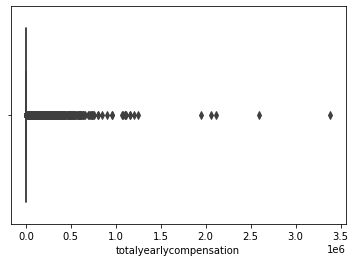

In [ ]:
import seaborn as sns
sns.boxplot(x=df['totalyearlycompensation'])

The data is highly skewed towards right. The median compensation is \\$188,000 however the mean is ~\\$3,296,000. 
Furthermore, the maximum salary submission is at 3.38 billion. 

As the salary submission in levels.fyi can be collected in the unit of thousand ('000), it is reasonable to suspect that some of the submission has mistakenly submit the compensation as US$ instead of US\\$ '000. For example, if one is getting yearly compensation is \\$120,000, he/she shall key in 120, instead of 120,000.

Let's taking the submission where the base salary, value of stock grant and bonus has been consistently inputing a value that exeeds 2,000 (where it means \\$2,000,000)

In [ ]:
df[(df['basesalary'] >= 2000) & 
   ((df['stockgrantvalue'] == 0) | (df['stockgrantvalue'] >= 2000)) & 
   ((df['bonus'] == 0) | (df['bonus'] >= 2000))]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,Unknown,11521,819,2017,US,WA,Redmond
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,Unknown,1320,0,2017,Canada,BC,Vancouver
7,Amazon,L5,Software Engineer,153939,"Seattle, WA",3,3,101828,52111,0,Unknown,11527,819,2017,US,WA,Seattle
14,Microsoft,59,Software Engineer,135281,"Seattle, WA",1,1,118988,8364,7929,Unknown,11527,819,2017,US,WA,Seattle
19,Microsoft,61,Product Manager,108698,"Seattle, WA",6,3,99095,4549,5054,Unknown,11527,819,2017,US,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,Amazon,L6,Hardware Engineer,194710,"Sunnyvale, CA",20,3,154481,40229,0,Male,7472,807,2019,US,CA,Sunnyvale
11345,Netflix,Senior Software Engineer,Software Engineer,250336,"San Francisco, CA",11,2,250336,0,0,Unknown,7419,807,2019,US,CA,San Francisco
11450,Morgan Stanley,Analyst,Software Engineer,79702,"New York, NY",1,0,70851,0,8851,Male,10182,501,2019,US,NY,New York
11478,Amazon,L4,Software Engineer,161930,"Seattle, WA",0,0,141299,20631,0,Male,11527,819,2019,US,WA,Seattle


A quick glance shows that the assumption made is correct. For example, a Microsoft Software Engineer is reasonable to believe paid at ~\\$135k annually, instead of \\$135mil anually.

We will now have these submissions divide by 1000.

In [ ]:
import numpy as np
df['to_divide'] = np.where(( 
                (df['basesalary'] >= 2000) & 
                ((df['stockgrantvalue'] == 0) | (df['stockgrantvalue'] >= 2000)) & 
                ((df['bonus'] == 0) | (df['bonus'] >= 2000))),1000,1)

df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,to_divide
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,Unknown,7392,807,2017,US,CA,Redwood City,1
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,Unknown,11527,819,2017,US,WA,Seattle,1
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,Unknown,11521,819,2017,US,WA,Redmond,1000
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,Unknown,1320,0,2017,Canada,BC,Vancouver,1000
5,Apple,M1,Software Engineering Manager,423,"Sunnyvale, CA",6,6,157,219,47,Unknown,7472,807,2017,US,CA,Sunnyvale,1


In [ ]:
df['basesalary'] = df['basesalary']/df['to_divide']
df['stockgrantvalue'] = df['stockgrantvalue']/df['to_divide']
df['bonus'] = df['bonus']/df['to_divide']
df['totalyearlycompensation'] = df['totalyearlycompensation']/df['to_divide']

df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,to_divide
0,Oracle,L3,Product Manager,186.000,"Redwood City, CA",1,1,160.000,17.000,9.000,Unknown,7392,807,2017,US,CA,Redwood City,1
2,Amazon,L7,Product Manager,126.000,"Seattle, WA",10,0,126.000,0.000,0.000,Unknown,11527,819,2017,US,WA,Seattle,1
3,Microsoft,64,Software Engineering Manager,171.348,"Redmond, WA",13,13,92.799,55.371,23.178,Unknown,11521,819,2017,US,WA,Redmond,1000
4,Amazon,L5,Software Engineer,214.175,"Vancouver, BC, Canada",13,1,156.335,0.000,57.840,Unknown,1320,0,2017,Canada,BC,Vancouver,1000
5,Apple,M1,Software Engineering Manager,423.000,"Sunnyvale, CA",6,6,157.000,219.000,47.000,Unknown,7472,807,2017,US,CA,Sunnyvale,1


In [ ]:
#let's examine the totalyearlycompensation again
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,year,to_divide
count,6.034500e+04,60345.000000,60345.000000,60345.000000,6.034500e+04,60345.000000,60345.000000,60345.000000
mean,5.144260e+02,7.173784,2.679675,294.182135,1.739871e+02,46.256761,2020.114989,11.247427
std,9.168951e+03,6.432553,3.519011,4945.193574,6.867547e+03,1111.389886,0.877404,100.659515
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2017.000000,1.000000
25%,1.230000e+02,3.000000,0.000000,93.000000,1.000000e+00,3.000000,2020.000000,1.000000
50%,1.870000e+02,5.000000,1.000000,133.000000,2.500000e+01,13.000000,2020.000000,1.000000
75%,2.700000e+02,10.000000,4.000000,182.000000,6.600000e+01,27.000000,2021.000000,1.000000
max,1.160132e+06,90.000000,90.000000,342782.000000,1.055359e+06,116638.000000,2021.000000,1000.000000


In [ ]:
df[df['totalyearlycompensation'] >= 1000000]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,to_divide
924,Facebook,E5,Software Engineer,1160132.0,"Menlo Park, CA",8,0,163.0,1055359.0,104610.0,Male,7300,807,2018,US,CA,Menlo Park,1


In [ ]:
df['stockgrantvalue'].mask(df['totalyearlycompensation'] >= 1000000, df['stockgrantvalue']/1000, inplace = True)
df['bonus'].mask(df['totalyearlycompensation'] >= 1000000, df['bonus']/1000, inplace = True)

In [ ]:
df['totalyearlycompensation'].mask(df['totalyearlycompensation'] >= 1000000, df['basesalary']+df['stockgrantvalue']+df['bonus'] , inplace = True)

In [ ]:
# check if the data is corrected corerctly
df.loc[[924]]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,to_divide
924,Facebook,E5,Software Engineer,1322.969,"Menlo Park, CA",8,0,163.0,1055.359,104.61,Male,7300,807,2018,US,CA,Menlo Park,1


In [ ]:
#let's examine the totalyearlycompensation again
df[['totalyearlycompensation','basesalary','stockgrantvalue','bonus']].describe()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus
count,60345.000000,60345.000000,60345.000000,60345.000000
mean,495.222932,294.182135,156.515834,44.524963
std,7860.355721,4945.193574,5358.337251,1026.643595
min,3.000000,0.000000,0.000000,0.000000
25%,123.000000,93.000000,1.000000,3.000000
50%,187.000000,133.000000,25.000000,13.000000
75%,270.000000,182.000000,66.000000,27.000000
max,685150.000000,342782.000000,684882.000000,116638.000000


The data is less noisy, but it still highly skewed towards right. In this case, we will use the quartile to remove the outliers. Let's check out the 95th and 99th of quartile.

In [ ]:
df['totalyearlycompensation'].quantile([0.95,0.99])

0.95    481.0
0.99    788.0
Name: totalyearlycompensation, dtype: float64

The 95th quartile and 99th quartile are at \\$475,000 and \\$788,000. Yearly compensation of \\$788,000 is possible and hence we will use this as cut-off point in removing the outliers.

In [ ]:
df = df[df['totalyearlycompensation'] <= 788]
df[['totalyearlycompensation','basesalary','stockgrantvalue','bonus']].describe()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus
count,59743.000000,59743.000000,59743.000000,59743.000000
mean,209.668352,140.312230,49.734989,19.621133
std,124.631094,67.949272,71.823019,26.011498
min,3.000000,0.000000,0.000000,0.000000
25%,123.000000,92.000000,1.000000,3.000000
50%,185.000000,132.000000,24.000000,13.000000
75%,267.000000,180.000000,64.000000,27.000000
max,788.000000,785.000000,680.000000,517.000000


<AxesSubplot:ylabel='Frequency'>

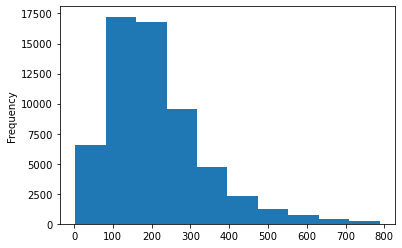

In [ ]:
df['totalyearlycompensation'].plot.hist(by=None, bins=10)

The total yearly compensation, including base salary, stock grant value and bonus is now looks cleaner.

#### Cleaning up yearsofexperience column

<AxesSubplot:xlabel='yearsofexperience'>

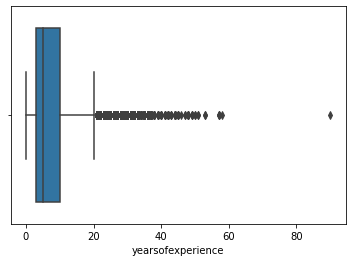

In [ ]:
import seaborn as sns
sns.boxplot(x=df['yearsofexperience'])

In [ ]:
# check out the outlier
df[df['yearsofexperience'] > 80]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,state,city,to_divide
47788,Disney,5,Product Designer,141.0,"Crapo, MD",90,90,139.0,2.0,0.0,Unknown,23596,512,2021,US,MD,Crapo,1


In [ ]:
df = df[df['yearsofexperience'] <= 80]
df.describe()                            

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,year,to_divide
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,209.669501,7.114442,2.665093,140.312252,49.735788,19.621461,2020.120870,11.033143
std,124.631821,6.375492,3.485200,67.949841,71.823354,26.011591,0.871521,99.612306
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
25%,123.000000,3.000000,0.000000,92.000000,1.000000,3.000000,2020.000000,1.000000
50%,185.000000,5.000000,1.000000,132.000000,24.000000,13.000000,2020.000000,1.000000
75%,267.000000,10.000000,4.000000,180.000000,64.000000,27.000000,2021.000000,1.000000
max,788.000000,58.000000,47.000000,785.000000,680.000000,517.000000,2021.000000,1000.000000


### Explore data

Data exploration must be aligned with the project objective - to predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

Hence we prioritise the following questions:
1. What are the features that will affect annual compensation offered?
2. How does those features change wrt annual compensation offered?
3. What are the irrelevant (and uncorrelated) features that we can drop?

From here, we can extend to these questions:
1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. For the same position and job level, does 2021 compensation higher than in 2017? If yes, is it aligned with inflation?
3. Are women underpaid in these companies? If yes, by how much?
4. Does different company offer differently for the same position or there is no disparity?
5. Does years in company affect total compensation? If yes, which part of compensation was affected - base salary, stock value or bonus?
6. For the same position or job level, does location affect total compensation regardless of gender?

Good to know:
1. What are the factors impacting the salary of a data scientist?
2. What is the salary trend for data scientist? and its comparison to living cost?
3. What is the predicted salary for data scientist in next 5 years?

## References

Best Jobs in America 2022 Employees' Choice (2022). Glassdoor. Retrived on May 3, 2022 from
https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Data Scientist Salary-The Ultimate Guide for 2021 (2022). ProjectPro. Retrived on May 3, 2022 from https://www.projectpro.io/article/data-scientist-salary-the-ultimate-guide-for-2021/218

Davenport, T H. & Patil, DJ. (2012). Data Scientist: The Sexiest Job of the 21st Century. *HARVARD BUSINESS REVIEW*. Retrieved on 3 May, 2022 from https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

Martin, I., Mariello, A., Battiti, R. & Hernandez, J A. (2018). Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study. *International Journal of Computational Intelligence Systems, 11, 1192-1209*. https://libkey.io/libraries/2611/articles/225996272/full-text-file
    
    
Miller, H., Seckel, Ea., White, CL., et al. (2021). Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA. http://dx.doi.org/10.1136/bmjopen-2021-059216
    
Seaman, A. (2021). LinkedIn Jobs on the Rise: 15 opportunities that are in demand and hiring now. Retrieved on May 3, 2022 from https://www.linkedin.com/pulse/linkedin-jobs-rise-15-opportunities-demand-hiring-now-andrew-seaman/ 
